In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# static:
%matplotlib inline 


In [71]:
data = pd.read_csv('full-data.csv')
# df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
data.head()

,Journal Title,ISSN,eISSN,Year,Volume,Issue,Page,DOI,PMCID,PMID,...,dic,sixltr,insight,cause,discrep,tentat,certain,quant,numbers,jargon
0,Mol Cancer,NaN,1476-4598,2003,2.0,NaN,28,10.1186/1476-4598-2-28,PMC184456,12935295.0,...,0.323497,2216,0.143409,0.185328,0.063844,0.195670,0.119967,0.160507,0.047987,0.676503
1,Mol Cancer,NaN,1476-4598,2003,2.0,NaN,33,10.1186/1476-4598-2-33,PMC222989,14572313.0,...,0.305925,1186,0.114268,0.159915,0.039299,0.176239,0.090085,0.116385,0.035369,0.694075
2,Reprod Biol Endocrinol,NaN,1477-7827,2003,1.0,NaN,125,10.1186/1477-7827-1-125,PMC317376,14678567.0,...,0.339406,1175,0.147422,0.191984,0.062500,0.191984,0.120235,0.137332,0.058857,0.660594
3,Biomed Eng Online,NaN,1475-925X,2004,3.0,NaN,13,10.1186/1475-925X-3-13,PMC419711,15125779.0,...,0.359481,5985,0.140725,0.192981,0.048068,0.192746,0.107343,0.134710,0.057977,0.640519
4,BMC Evol Biol,NaN,1471-2148,2004,4.0,NaN,18,10.1186/1471-2148-4-18,PMC459214,15222900.0,...,0.376855,1758,0.148616,0.195347,0.048937,0.224629,0.126554,0.168071,0.040112,0.623145


In [75]:
print(data.shape)
print(data.columns)

(2177, 40)
Index(['Journal Title', 'ISSN', 'eISSN', 'Year', 'Volume', 'Issue', 'Page',
       'DOI', 'PMCID', 'PMID', 'Manuscript Id', 'Release Date', 'File',
       'Article Citation', 'Last Updated (YYYY-MM-DD HH:MM:SS)', 'License',
       'Retracted', 'Text', 'gunning_fog', 'pos', 'neg', 'neu', 'Citations',
       'Times Cited', 'Number Authors', 'Keywords', 'Journal Impact Factor',
       'wc', 'sc', 'wps', 'dic', 'sixltr', 'insight', 'cause', 'discrep',
       'tentat', 'certain', 'quant', 'numbers', 'jargon'],
      dtype='object')


In [95]:
features = ['gunning_fog', 'Citations', 'Times Cited', 'Number Authors', 'Journal Impact Factor'
           , 'sixltr', 'jargon']

In [126]:
df = data[features]
df.Citations.describe()

count    2177.000000
mean        5.806615
std        16.081187
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max       312.000000
Name: Citations, dtype: float64

## Distribution of data


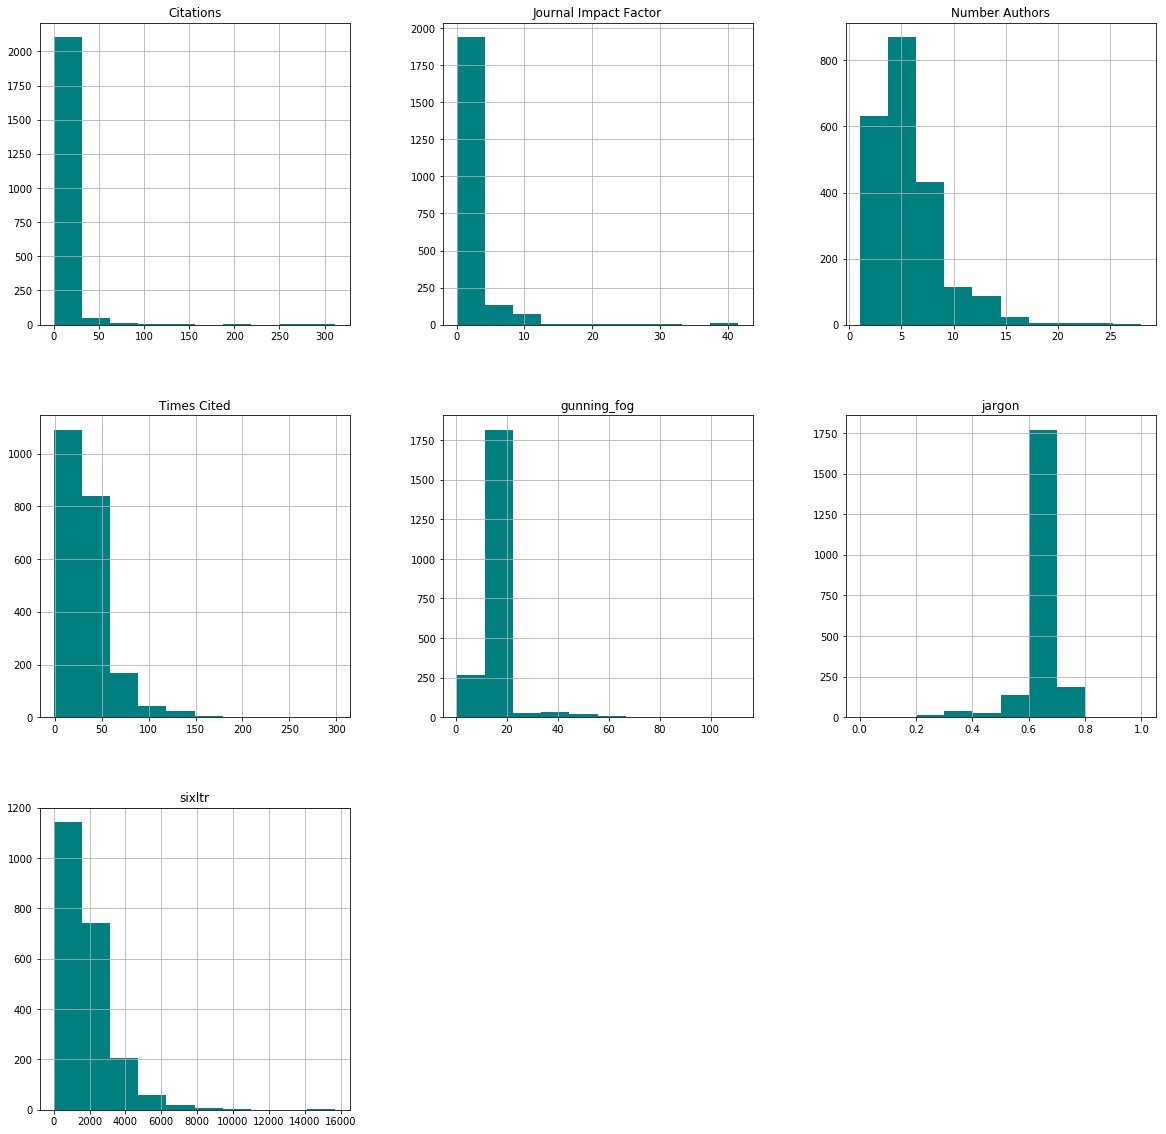

In [127]:
# Histogram matrix for quick visualization of all columns
plots = df.hist(figsize=(20, 20), color='teal')
plt.title('Histogram Matrix')
plt.savefig('histo_matrix.png', dpi=400)

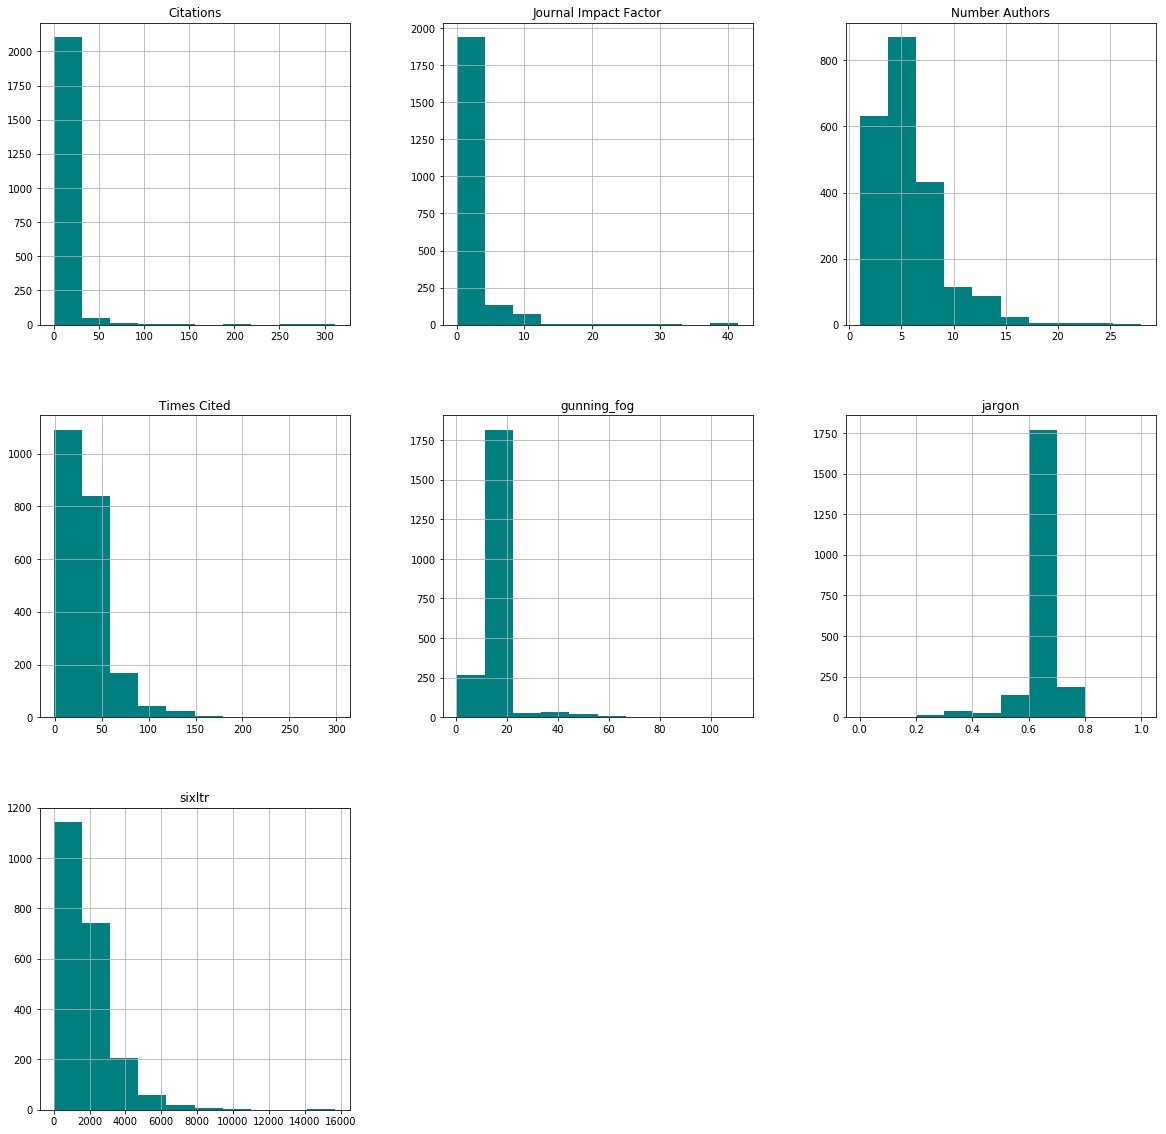

In [130]:
# Histogram matrix for quick visualization of all columns for RETRACTED
new_df = data.copy()
new_df = new_df[new_df['Retracted'] == True]
new_df = new_df[features]
plots = df.hist(figsize=(20, 20), color='teal')
plt.savefig('histo_matrix_retracted.png', dpi=400)

## Correlation between columns

We compute the Pearson correlation matrix using normalized data for each random variable.

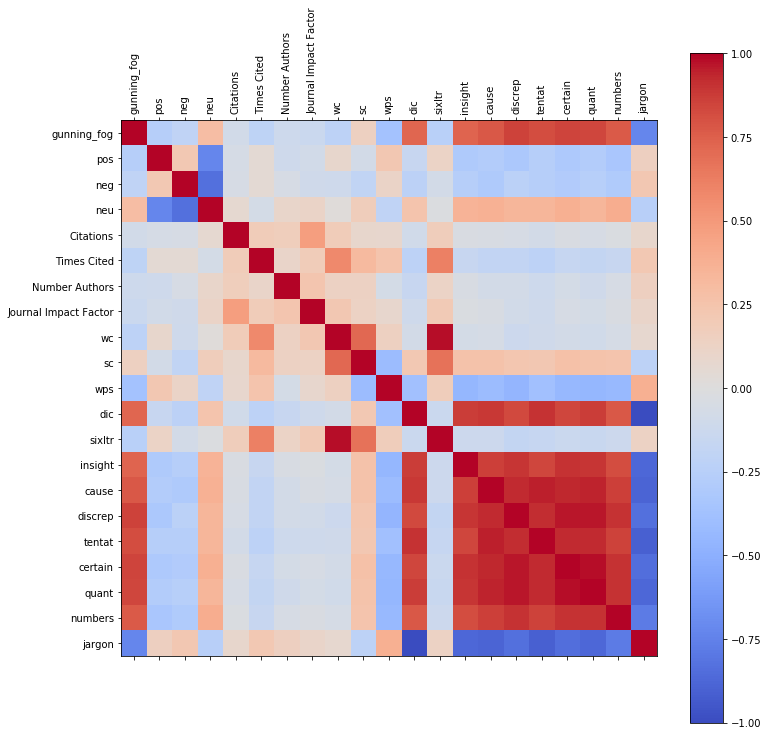

In [112]:
quant_features = [
        'gunning_fog', 'pos', 'neg', 'neu', 'Citations',
       'Times Cited', 'Number Authors', 'Journal Impact Factor',
       'wc', 'sc', 'wps', 'dic', 'sixltr', 'insight', 'cause', 'discrep',
       'tentat', 'certain', 'quant', 'numbers', 'jargon']
df = data[quant_features]
corr_matrix = df.corr(method='pearson')

corr_plt = plt.matshow(corr_matrix, cmap=plt.cm.coolwarm, vmax=1)
corr_plt.figure.set_size_inches(12, 12, forward=True)
corr_plt.axes.set_xticks(np.arange(len(corr_matrix.columns)))
corr_plt.axes.set_xticklabels(corr_matrix.columns, rotation=90)
corr_plt.figure.colorbar(corr_plt)
corr_plt.axes.set_yticks(np.arange(len(corr_matrix.columns)))
corr_plt.axes.set_yticklabels(corr_matrix.columns)
plt.savefig('corr_matrix.png', dpi=400)

## Most correlation

In [105]:
column1_names = []
column2_names = []
corr_values = []
for i, col1 in enumerate(corr_matrix.columns):
    for j, col2 in enumerate(corr_matrix.columns):
        # skip diagonals or lower triangular part
        if i == j or i > j:
            continue
        column1_names.append(col1)
        column2_names.append(col2)
        corr_values.append(abs(corr_matrix[col1][col2]))
        
corr_df = pd.DataFrame({'Column1' : column1_names, 
                            'Column2' : column2_names, 
                            'Corr value': corr_values})

corr_df.sort_values(by='Corr value', ascending=False, inplace=True)
corr_df

,Column1,Column2,Corr value
173,dic,jargon,1.000000
135,wc,sixltr,0.981434
204,certain,quant,0.979202
196,discrep,certain,0.964269
197,discrep,quant,0.963326
190,cause,tentat,0.951655
192,cause,quant,0.940337
191,cause,certain,0.935160
201,tentat,quant,0.929299
200,tentat,certain,0.925090


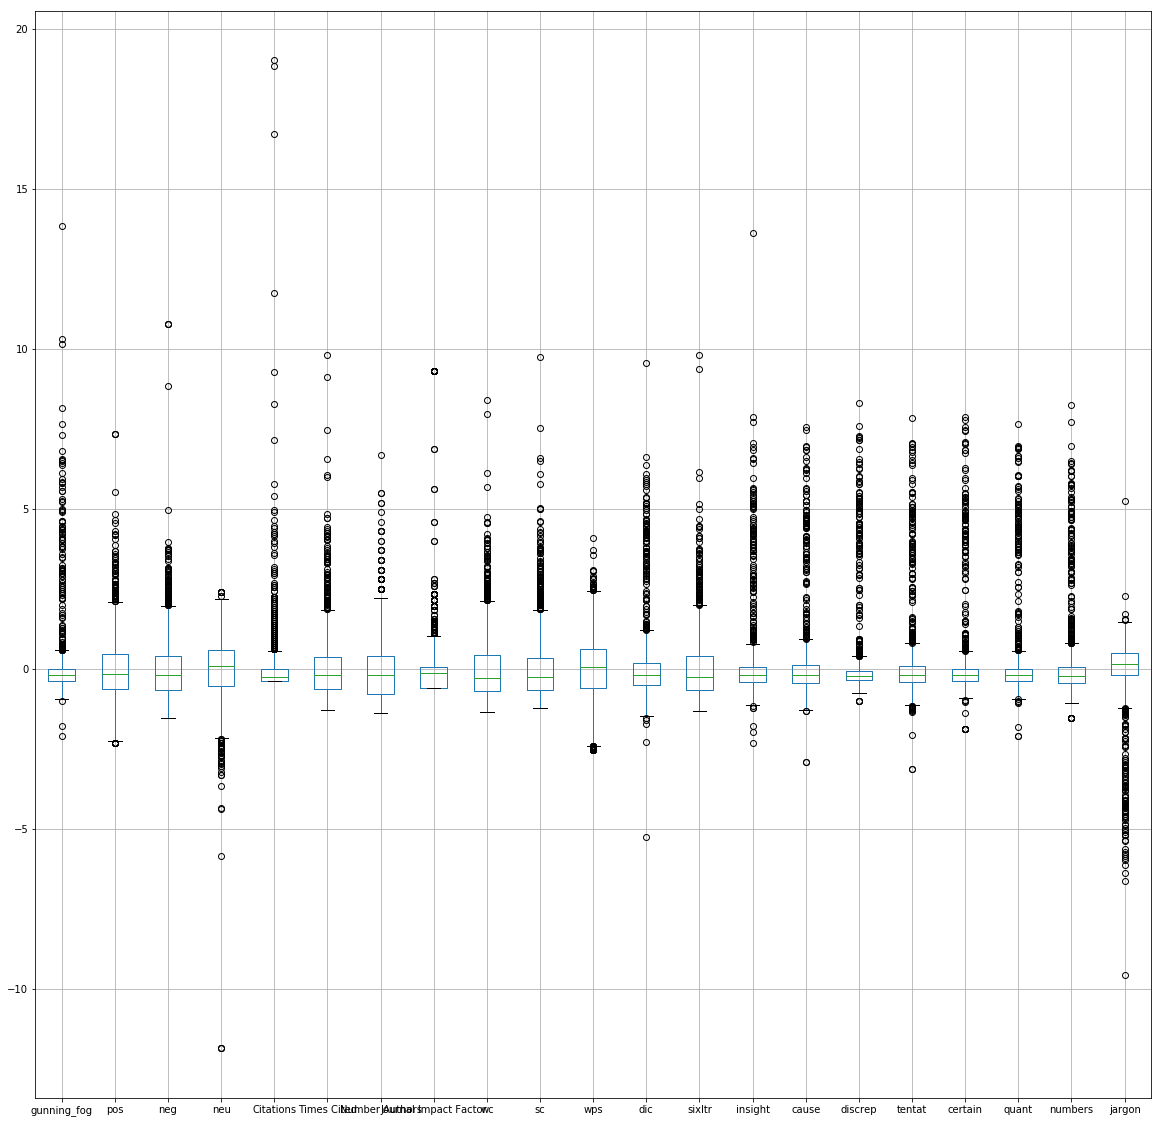

In [115]:
norm = (df - df.mean()) / df.std()
pd.plotting.boxplot(norm, figsize=(20, 20))

In [36]:
data = pd.read_csv('JournalHomeGrid_withISSN.csv')

In [39]:
data

,Rank,Full Journal Title,ISSN,Total Cites,Journal Impact Factor,Eigenfactor Score
0,1,CA-A CANCER JOURNAL FOR CLINICIANS,0007-9235,"28,839",244.585,0.066
1,2,NEW ENGLAND JOURNAL OF MEDICINE,0028-4793,"332,831",79.26,0.702
2,3,LANCET,0140-6736,"233,269",53.254,0.436
3,4,CHEMICAL REVIEWS,0009-2665,"174,920",52.613,0.265
4,5,Nature Reviews Materials,2058-8437,"3,218",51.941,0.015
5,6,NATURE REVIEWS DRUG DISCOVERY,1474-1776,"31,313",50.167,0.054
6,7,JAMA-JOURNAL OF THE AMERICAN MEDICAL ASSOCIATION,0098-7484,"148,775",47.661,0.300
7,8,Nature Energy,2058-7546,"5,072",46.859,0.020
8,9,NATURE REVIEWS CANCER,1474-175X,"50,407",42.784,0.080
9,10,NATURE REVIEWS IMMUNOLOGY,1474-1733,"39,215",41.982,0.085


In [66]:
new_df = df.copy()
new_df['Cat'] = np.random.randint(0, 3, size=(100,1))

In [134]:
# new_df['Cat'] = new_df.loc[new_df['Cat'] <= 25, 'Cat'] = 1
# new_df['Cat'] = new_df.loc[(new_df['Cat'] > 25) & (new_df['Cat'] <= 75), 'Cat'] = 2
# new_df['Cat'] = new_df.loc[(new_df['Cat'] > 75) & (new_df['Cat'] <= 100), 'Cat'] = 3

In [135]:
data.columns

Index(['Journal Title', 'ISSN', 'eISSN', 'Year', 'Volume', 'Issue', 'Page',
       'DOI', 'PMCID', 'PMID', 'Manuscript Id', 'Release Date', 'File',
       'Article Citation', 'Last Updated (YYYY-MM-DD HH:MM:SS)', 'License',
       'Retracted', 'Text', 'gunning_fog', 'pos', 'neg', 'neu', 'Citations',
       'Times Cited', 'Number Authors', 'Keywords', 'Journal Impact Factor',
       'wc', 'sc', 'wps', 'dic', 'sixltr', 'insight', 'cause', 'discrep',
       'tentat', 'certain', 'quant', 'numbers', 'jargon'],
      dtype='object')

In [147]:
feats = ['gunning_fog', 'jargon', 'Journal Impact Factor', 'Number Authors', 'Times Cited', 'Citations']
for y in feats:
    x = 'Retracted'
    print('Mean Correlation by:', y)
    print(data[[x, y]].groupby(x, as_index=False).mean())
    print('-'*30)

Mean Correlation by: gunning_fog
   Retracted  gunning_fog
0      False    14.857622
1       True    14.709470
------------------------------
Mean Correlation by: jargon
   Retracted    jargon
0      False  0.642485
1       True  0.649322
------------------------------
Mean Correlation by: Journal Impact Factor
   Retracted  Journal Impact Factor
0      False               2.484132
1       True               2.519480
------------------------------
Mean Correlation by: Number Authors
   Retracted  Number Authors
0      False        5.632519
1       True        5.521114
------------------------------
Mean Correlation by: Times Cited
   Retracted  Times Cited
0      False    33.347744
1       True    32.909254
------------------------------
Mean Correlation by: Citations
   Retracted  Citations
0      False   5.462406
1       True   6.135669
------------------------------


In [181]:
selected_quant = ['gunning_fog', 'Citations', 'Times Cited', 'wc', 'jargon']
gbdf = data[[x] + selected_quant].groupby(x, as_index=False).mean()
gbdf

,Retracted,gunning_fog,Citations,Times Cited,wc,jargon
0,False,14.857622,5.462406,33.347744,5677.306391,0.642485
1,True,14.709470,6.135669,32.909254,5720.781671,0.649322


In [182]:
# cols = [x] + selected_quant
# print(gbdf.to_latex(columns=cols, encoding='utf-8', escape=False, index=False))

In [170]:
# gbdf.to_csv('groupby-data.csv', index=False)

In [222]:
# pvals = [0.003369,
# 0.00319,
# 0.03691,
# 0.004213,
# 0.002428,
# 0.003369]
names = ['Gunning Fog', 'Citations', 'Times Cited', 'Word Count', 'Jargon']



# p_df = pd.DataFrame(data=zip(names, pvals), columns=['RV', 'One-sample t-test p-value'])
# print(p_df.to_latex(columns=['RV', 'One-sample t-test p-value'], encoding='utf-8', escape=False, index=False))

In [190]:
import scipy
import scipy.stats

In [195]:
r_df = data[data['Retracted'] == True]
r_df = r_df.drop(['Retracted'], axis=1)
r_df = r_df[quant_features]

n_df = data[data['Retracted'] == False]
n_df = n_df.drop(['Retracted'], axis=1)
n_df = n_df[quant_features]

In [246]:
result = scipy.stats.ttest_ind(r_df, n_df, equal_var=False)
print(r_df.columns)
# result.pvalue
print(result)

Index(['gunning_fog', 'pos', 'neg', 'neu', 'Citations', 'Times Cited',
       'Number Authors', 'Journal Impact Factor', 'wc', 'sc', 'wps', 'dic',
       'sixltr', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'quant',
       'numbers', 'jargon'],
      dtype='object')
Ttest_indResult(statistic=array([-0.49953941, -1.62577377,  0.34348504,  0.68261182,  0.98244654,
       -0.37624387, -0.77743307,  0.19643188,  0.23678442, -1.24010769,
       -0.01689829, -2.36056768, -0.07922197, -0.87901924, -0.1218769 ,
        0.10448924, -0.80609841, -0.17206593, -0.84680205,  1.41035944,
        2.36056768]), pvalue=array([0.61744999, 0.10414518, 0.73126745, 0.49492686, 0.32599487,
       0.70677449, 0.43698786, 0.84429054, 0.81284658, 0.21507646,
       0.98651934, 0.01833652, 0.93686344, 0.37949433, 0.90300809,
       0.91679092, 0.42027632, 0.863402  , 0.39719987, 0.15857867,
       0.01833652]))


In [244]:
d = dict(zip(r_df.columns, result.pvalue))

ValueError: dictionary update sequence element #0 has length 3; 2 is required

In [245]:
dict(zip(result.pvalue, result.statistic))

{0.018336519223875077: 2.360567680522381,
 0.018336519223876007: -2.360567680522362,
 0.10414518485537119: -1.6257737657673224,
 0.1585786698431292: 1.410359439690707,
 0.21507646031102312: -1.240107686071352,
 0.325994869537393: 0.9824465430208495,
 0.3794943280670108: -0.8790192441085634,
 0.3971998712563044: -0.8468020507779452,
 0.4202763180530307: -0.8060984060625778,
 0.4369878563003321: -0.7774330747524428,
 0.4949268559004609: 0.6826118208559617,
 0.6174499859417458: -0.4995394053721149,
 0.7067744924272144: -0.3762438726062927,
 0.7312674542036929: 0.3434850419137273,
 0.8128465775055383: 0.2367844177640485,
 0.8442905431178882: 0.19643187630051384,
 0.8634019997147175: -0.172065929564039,
 0.9030080883147322: -0.12187690243634353,
 0.9167909226921478: 0.10448923702771229,
 0.9368634418124984: -0.07922196592318338,
 0.9865193354248283: -0.01689829383372563}

In [233]:
stats_df = pd.DataFrame(result.pvalue, r_df.columns, columns=['Pvalue'])
stats_df.sort_values('Pvalue', axis=0, inplace=True)
tode = ['dic', 'pos', 'numbers', 'sc', 'insight', 'quant', 'tentat', 'Number Authors',
       'neg', 'Journal Impact Factor', 'certain', 'cause', 'discrep'
       ,'neu', 'sixltr', 'wps']
stats_df.drop(tode, axis=0, inplace=True)
stats_df

,Pvalue
jargon,0.018337
Citations,0.325995
gunning_fog,0.617450
Times Cited,0.706774
wc,0.812847


In [239]:
print(stats_df.to_latex(columns=['Pvalue'], encoding='utf-8', escape=False, index=True))

\begin{tabular}{lr}
\toprule
{} &    Pvalue \\
\midrule
jargon      &  0.018337 \\
Citations   &  0.325995 \\
gunning_fog &  0.617450 \\
Times Cited &  0.706774 \\
wc          &  0.812847 \\
\bottomrule
\end{tabular}



In [240]:
data.isnull().any()

Journal Title                         False
ISSN                                   True
eISSN                                  True
Year                                  False
Volume                                 True
Issue                                  True
Page                                  False
DOI                                    True
PMCID                                 False
PMID                                   True
Manuscript Id                          True
Release Date                          False
File                                  False
Article Citation                      False
Last Updated (YYYY-MM-DD HH:MM:SS)    False
License                               False
Retracted                             False
Text                                  False
gunning_fog                           False
pos                                   False
neg                                   False
neu                                   False
Citations                       